# Setup

In [ ]:
import pandas as pd

# Obtain

This data was obtained from the Maricopa County Assessor under the search "Fast Food". The query has approximately 1342 results, with only 1000 returned due MCA Data Policies. 

In [ ]:
df = pd.read_csv('/content/mca_fast_food_search.csv')

In [ ]:
df.head()

,APN,Owner,Address,City,Zip,Subdivison Name,MCR,S/T/R,Property Type,Rental
0,20112805,67TH AVENUE & HAPPY VALLEY LLC,6645 W HAPPY VALLEY RD,GLENDALE,85310.0,FRYS FOOD STORE 67TH AVENUE & HAPPY VALLEY ROAD,60745.0,74N2E,Fast Food Restaurant,N
1,20112809,67TH AVENUE & HAPPY VALLEY LLC,6535 W HAPPY VALLEY RD,GLENDALE,85310.0,FRYS FOOD STORE 67TH AVENUE & HAPPY VALLEY ROAD,60745.0,74N2E,Fast Food Restaurant,N
2,40021153,BUCKEYE EXPRESS FOOD LLC,626 E MONROE AVE,BUCKEYE,85326.0,CENTRAL BUCKEYE BLOCKS 3 THRU 6 11 THRU 14,2028.0,51S3W,Fast Food Restaurant,N
3,10109061,GKP&B LTD PARTNERSHIP,9309 W VAN BUREN ST,TOLLESON,85353.0,PETES FISH AND CHIPS,116721.0,91N1E,Fast Food Restaurant,N
4,10114017,PSAROS FAMILY TRUST,9850 W LOWER BUCKEYE RD,TOLLESON,85353.0,PECAN PROMENADE,73148.0,161N1E,Fast Food Restaurant,N


# Scrub

Due to some `Subdivision Name` values posessing unescaped commas that interfered with Pandas' ability to properly align the columns, some manual cleaning in Libre Office was performed by me.

Aside from a handful of Null values, the data is fairly clean and requires little from Pandas.

## Null Values

Here are the sums and percentage of NULLS in the dataframe.
Interestingly, there are `17` NULLS that do not have any physical addresses. This amounts to `1.7%` of values for the `Address`, `City`, and `Zip`, and are all corresponding rows for those missing values. 

I have looked into a couple of these on the Maricopa County Assessor's GIS Portal, and they do not appear to have any assigned physical addresses. This is a good avenue of exploration for EDA. Possibly an error that could be corrected, or some obscure legal reason, but interesting nonetheless.

Additionally, there are `391` NULLS in `Subdivision Name` accounting for `39.1%`. This is a feature that I am interested in exploring to determine if there are any predominant groups. It could also generate a list of Entities that can be searched later to see if the dataset can be enriched beyond it's initial 1,000 record limit. 

There are `348` NULLS in the `MCR` column. This is the definition according to the [MCA Glossary](https://maps.mcassessor.maricopa.gov/help/glossary.html#:~:text=MCR%20(Maricopa%20county%20recorder%20number)) 

    MCR (MARICOPA COUNTY RECORDER NUMBER)
    Often associated with recorded plat maps.

This seems to be an uninteresting nominal value, so I will drop this columns.

While `Property Type` and `Rental` have no NULLS, 100% of those values are `Fast Food Restaurant` and `N` (for No), and therefore offer no useful information, and will be dropped.

I will leave the `S/T/R` column, although it also seems to be uninteresting nominal values, I am curious if there are predominent groups, and since it also has no NULLS, might be useful for further data enrichment.

In [ ]:
df.isnull().sum()

APN                  0
Owner                0
Address             17
City                17
Zip                 17
Subdivison Name    391
MCR                348
S/T/R                0
Property Type        0
Rental               0
dtype: int64

In [ ]:
df.isnull().mean()

APN                0.000
Owner              0.000
Address            0.017
City               0.017
Zip                0.017
Subdivison Name    0.391
MCR                0.348
S/T/R              0.000
Property Type      0.000
Rental             0.000
dtype: float64

## Dropping Values

In [ ]:
cleaned_df = df.drop(['MCR', 'Property Type', 'Rental'], axis = 1).copy()

In [ ]:
cleaned_df

,APN,Owner,Address,City,Zip,Subdivison Name,S/T/R
0,20112805,67TH AVENUE & HAPPY VALLEY LLC,6645 W HAPPY VALLEY RD,GLENDALE,85310.0,FRYS FOOD STORE 67TH AVENUE & HAPPY VALLEY ROAD,74N2E
1,20112809,67TH AVENUE & HAPPY VALLEY LLC,6535 W HAPPY VALLEY RD,GLENDALE,85310.0,FRYS FOOD STORE 67TH AVENUE & HAPPY VALLEY ROAD,74N2E
2,40021153,BUCKEYE EXPRESS FOOD LLC,626 E MONROE AVE,BUCKEYE,85326.0,CENTRAL BUCKEYE BLOCKS 3 THRU 6 11 THRU 14,51S3W
3,10109061,GKP&B LTD PARTNERSHIP,9309 W VAN BUREN ST,TOLLESON,85353.0,PETES FISH AND CHIPS,91N1E
4,10114017,PSAROS FAMILY TRUST,9850 W LOWER BUCKEYE RD,TOLLESON,85353.0,PECAN PROMENADE,161N1E
...,...,...,...,...,...,...,...
995,30165894,PROPCOR II ASSOCIATES LLC,3476 W FRYE RD,CHANDLER,85226.0,CHANDLER FASHION CENTER,361S4E
996,30165981,RICHARD AND LISA KELTER LIVING TRUST,3141 W FRYE RD,CHANDLER,85226.0,CHANDLER VIRIDIAN PRIMEGATE MLD,361S4E
997,30167963,RILCK BK 9316 LLC,4979 W RAY RD,CHANDLER,85226.0,CORONA DEL SOL PLAZA,261S4E
998,30169027M,MILLER RUSSELL D,4111 E CHANDLER BLVD,PHOENIX,85048.0,NaN,311S4E


# Explore

## Value Counts

### City

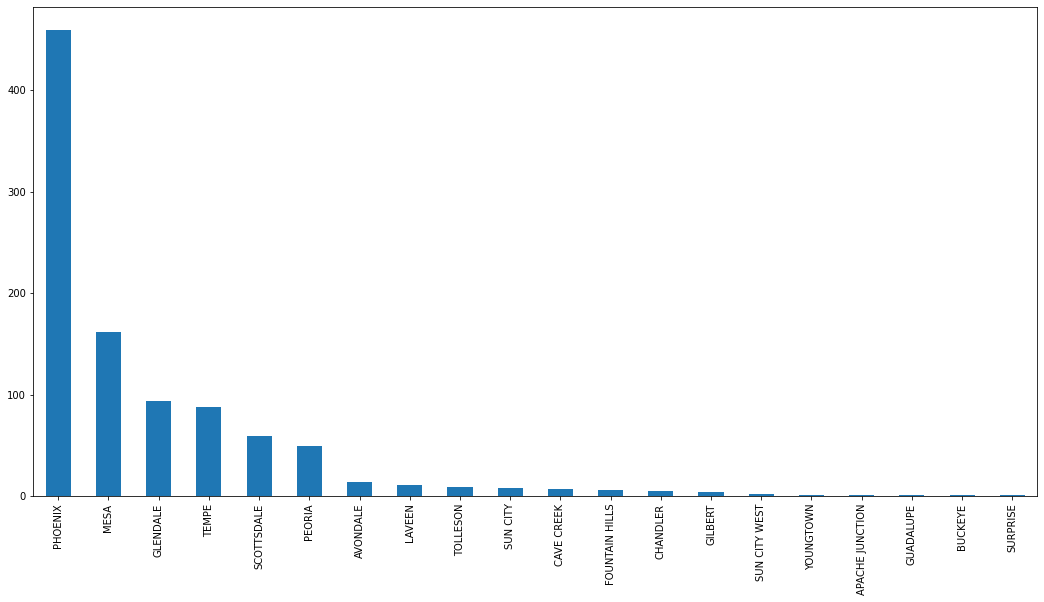

In [ ]:
cleaned_df['City'].value_counts().plot(kind='bar', figsize = (18, 9))

### Zip

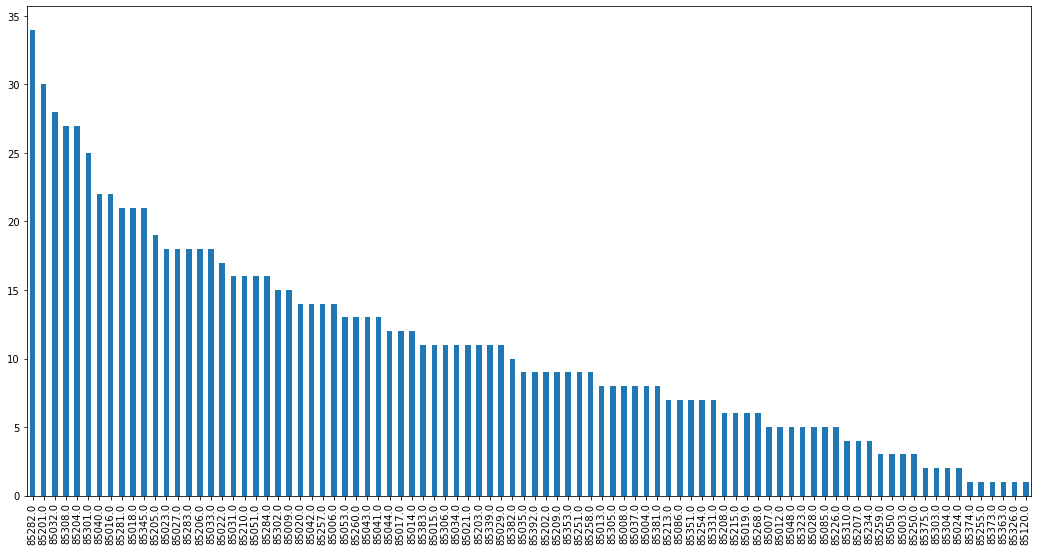

In [ ]:
cleaned_df['Zip'].value_counts().plot(kind='bar', figsize = (18,9))

### Owner

The top 20 companies would be good to search for data enrichment.

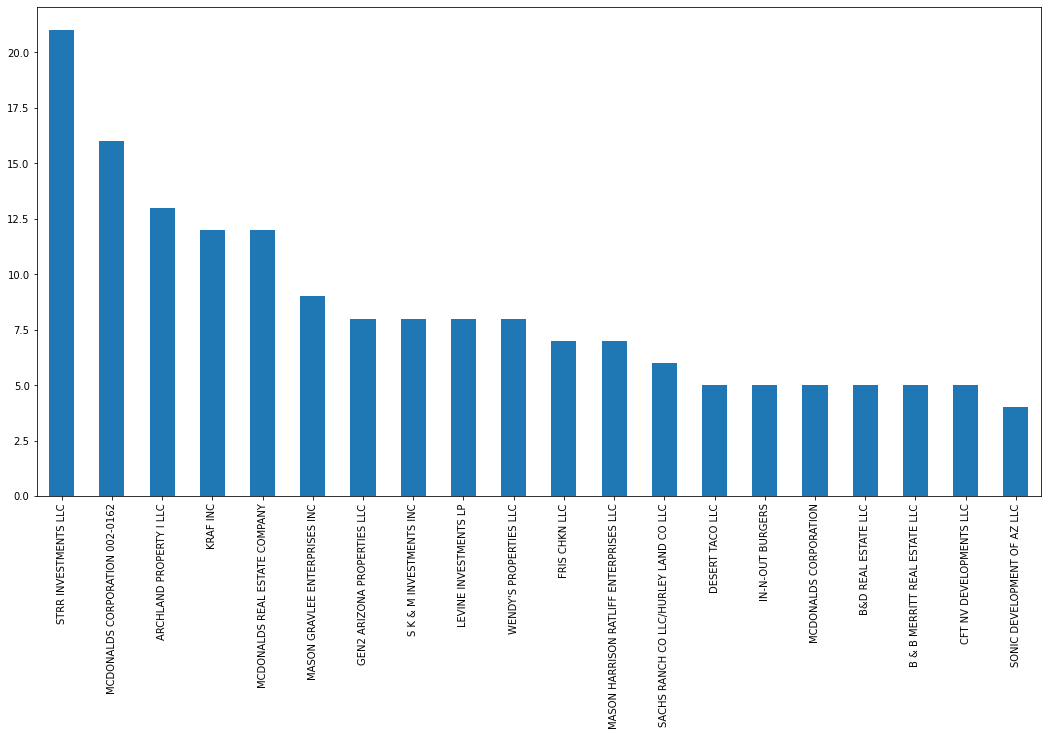

In [ ]:
cleaned_df['Owner'].value_counts().head(20).plot(kind='bar', figsize = (18,9))

### Subdivision Name

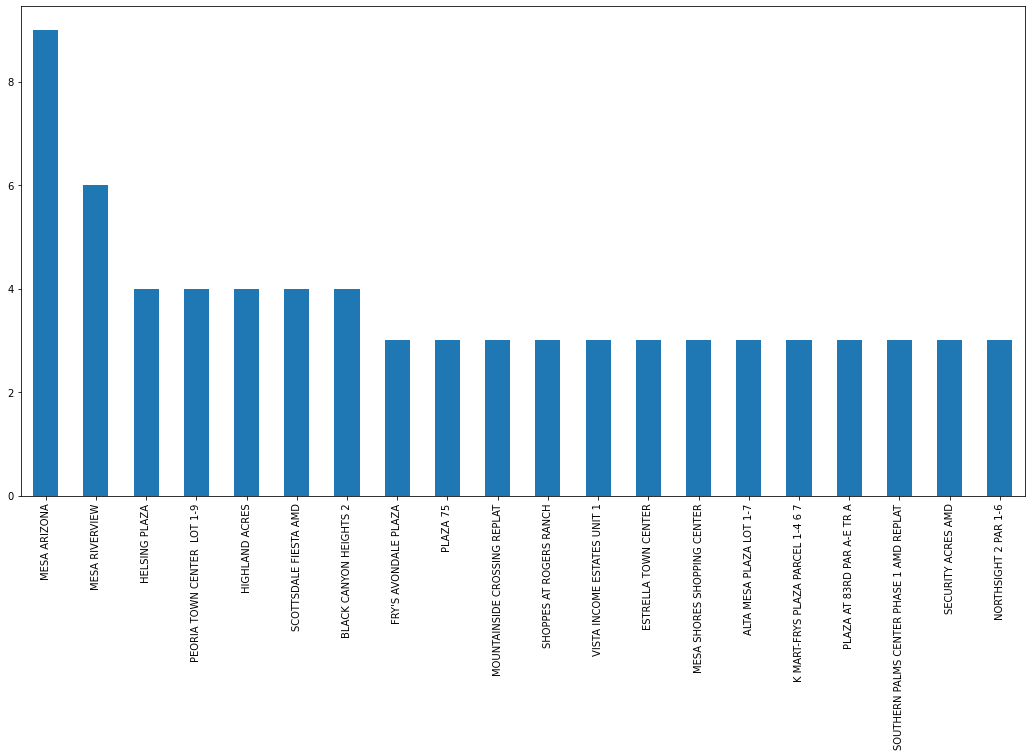

In [ ]:
cleaned_df['Subdivison Name'].value_counts().head(20).plot(kind='bar', figsize = (18,9))

I checked through `MESA ARIZONA`, `MESA RIVERVIEW`, and `HELSING PLAZA`, but the only one of interests was `MESA RIVERVIEW`, since all parcels in the dataset are owned by two-entity split between `SACHS RANCH CO LLC`, and `HURLEY LAND CO LLC`.

Both companies have been searched and yeilded additional properties for data enrichment.

In [ ]:
cleaned_df[cleaned_df['Subdivison Name'] == 'MESA RIVERVIEW']

,APN,Owner,Address,City,Zip,Subdivison Name,S/T/R
362,13533547,SACHS RANCH CO LLC/HURLEY LAND CO LLC,953 N DOBSON RD,MESA,85201.0,MESA RIVERVIEW,171N5E
363,13533548,SACHS RANCH CO LLC/HURLEY LAND CO LLC,949 N DOBSON RD,MESA,85201.0,MESA RIVERVIEW,171N5E
364,13533556,SACHS RANCH CO LLC/HURLEY LAND CO LLC,905 N DOBSON RD,MESA,85201.0,MESA RIVERVIEW,171N5E
365,13533557,SACHS RANCH CO LLC/HURLEY LAND CO LLC,913 N DOBSON RD,MESA,85201.0,MESA RIVERVIEW,171N5E
366,13533558,SACHS RANCH CO LLC/HURLEY LAND CO LLC,917 N DOBSON RD,MESA,85201.0,MESA RIVERVIEW,171N5E
367,13533559,SACHS RANCH CO LLC/HURLEY LAND CO LLC,921 N DOBSON RD,MESA,85201.0,MESA RIVERVIEW,171N5E


### S/T/R

There are 417 unique values, which is too many features to plot as a bar chart, and even looking at the top 20 would probably not be of any immediate interest, but will be a good candidate for broader data enrichment.

In [ ]:
cleaned_df['S/T/R'].value_counts()

291N3E    11
221N5E    10
262N3E     9
231N4E     9
263N2E     8
          ..
211N3E     1
144N1E     1
234N2E     1
42N3E      1
71N3E      1
Name: S/T/R, Length: 417, dtype: int64

# Model

I will need to do some substantial data encrichment before I can do any modeling. I will compile a large dataset of APN's, which can be individually queried by the API to get more specific information, and will continue my analysis from there.

# Interpret

At this time, with the limited number of initial features, and all nominal values, the only interpretation I can draw is that there are plenty of useful features for further data enrichment. More to follow.

# Data Enrichment

## Owner

Investigate the top `20` Entities for the `Owner` Value Counts (VC):
 - `STRR INVESTMENTS LLC`                    VC: 21
 - `MCDONALDS CORPORATION 002-0162`          VC: 16
 - `ARCHLAND PROPERTY I LLC`                 VC: 13
 - `KRAF INC`                                VC: 12
 - `MCDONALDS REAL ESTATE COMPANY`           VC: 12
 - `MASON GRAVLEE ENTERPRISES INC`           VC:  9
 - `GEN2 ARIZONA PROPERTIES LLC`             VC:  8
 - `S K & M INVESTMENTS INC`                 VC:  8
 - `LEVINE INVESTMENTS LP`                   VC:  8
 - `WENDY'S PROPERTIES LLC`                  VC:  8
 - `FRIS CHKN LLC`                           VC:  7
 - `MASON HARRISON RATLIFF ENTERPRISES LLC`  VC:  7
 - `SACHS RANCH CO LLC/HURLEY LAND CO LLC`   VC:  6
 - `DESERT TACO LLC`                         VC:  5
 - `IN-N-OUT BURGERS`                        VC:  5
 - `MCDONALDS CORPORATION`                   VC:  5
 - `B&D REAL ESTATE LLC`                     VC:  5
 - `B & B MERRITT REAL ESTATE LLC`           VC:  5
 - `CFT NV DEVELOPMENTS LLC`                 VC:  5
 - `SONIC DEVELOPMENT OF AZ LLC`             VC:  4

In [ ]:
cleaned_df['Owner'].value_counts().head(20)

STRR INVESTMENTS LLC                      21
MCDONALDS CORPORATION 002-0162            16
ARCHLAND PROPERTY I LLC                   13
KRAF INC                                  12
MCDONALDS REAL ESTATE COMPANY             12
MASON GRAVLEE ENTERPRISES INC              9
GEN2 ARIZONA PROPERTIES LLC                8
S K & M INVESTMENTS INC                    8
LEVINE INVESTMENTS LP                      8
WENDY'S PROPERTIES LLC                     8
FRIS CHKN LLC                              7
MASON HARRISON RATLIFF ENTERPRISES LLC     7
SACHS RANCH CO LLC/HURLEY LAND CO LLC      6
DESERT TACO LLC                            5
IN-N-OUT BURGERS                           5
MCDONALDS CORPORATION                      5
B&D REAL ESTATE LLC                        5
B & B MERRITT REAL ESTATE LLC              5
CFT NV DEVELOPMENTS LLC                    5
SONIC DEVELOPMENT OF AZ LLC                4
Name: Owner, dtype: int64

## S/T/R

Searching an `S/T/R` value in the MCA database returns a large number of values, but of many different property types. This would be a good search query for data enrichment, but of a broader scope than this analysis. It would be interesting to see what other property types (aside from Fast Food) could be explored.

**Useful Information**

 * [Public Land Survey System (PLSS) [Wikipedia]](https://en.wikipedia.org/wiki/Public_Land_Survey_System)

 * [S/T/R Explaination [PDF] (Arizona Dept. of Water Resources)](http://www.azwater.gov/azdwr/documents/township-section-rangecolor.pdf)

 * [Land Division Explaination (Glendale Community College)](https://web.gccaz.edu/~lynrw95071/Township%20Range%20Explanation.html)

 * [Interactive PLSS Township Map (Randy Majors)](https://www.randymajors.org/township-range-on-google-maps?x=-112.3456568&y=33.4170455&cx=-112.1012110&cy=33.4239228&zoom=9&color=1e73be&counties=show)


In [ ]:
cleaned_df['S/T/R'].value_counts()

291N3E    11
221N5E    10
262N3E     9
231N4E     9
263N2E     8
          ..
211N3E     1
144N1E     1
234N2E     1
42N3E      1
71N3E      1
Name: S/T/R, Length: 417, dtype: int64